<a href="https://colab.research.google.com/github/nebojsa-bozanic/OSuM/blob/master/OSuM_Vezba1/OSuM_Vezba1/OSuM_vezba_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Obrada slike u medicini (BMI)</h1>

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82


Laboratorijska vežba 1: Osnovne manipulacije

Potrebne biblioteke: cv2, numpy, matplotlib.pyplot, pydicom

1. Učitavanje, prikaz i snimanje slike

- fix rtg_2.png upload

In [4]:
!git clone https://github.com/nebojsa-bozanic/OSuM.git
%cd /content/OSuM/OSuM_Vezba1/OSuM_Vezba1

Cloning into 'OSuM'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 4), reused 36 (delta 3), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from google.colab.patches import cv2_imshow

1.1 U promenljivu im1 učitati sliku mr_glava_1.jpg u odgovarajućem režimu za sliku u
sivoj skali.

In [11]:
im1 = cv2.imread('mr_glava_1.jpg', cv2.IMREAD_GRAYSCALE) # ukoliko slika nije u ovom folderu ovde staviti putanju do nje
# IMREAD_GRAYSCALE - siva slika uint8 tipa

1.2 Sliku im1 prikazati koristeći funkcije iz cv2 biblioteke.

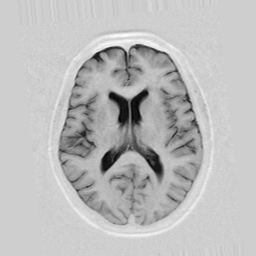

In [12]:
cv2_imshow(im1) # 'Slika 1',

1.3 Sliku im1 prikazati koristeći funkcije iz matplotlib.pyplot biblioteke.

Text(0.5, 1.0, 'Slika 1')

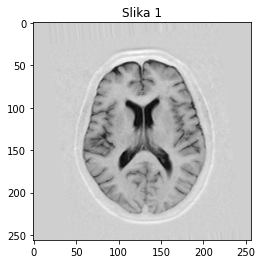

In [13]:
plt.figure(1)
plt.imshow(im1, cmap='gray')
plt.title('Slika 1')

1.4 Napraviti sliku im2 indeksiranjem slike im1. Iz im1 iseći piksele [100:200, :]. Koliko vrsta
ima slika im2?
1.5 Sačuvati sliku im2 pod nazivom mr1_crop.jpg.

In [14]:
im2 = im1[100:200, :]

1.5 Sačuvati sliku im2 pod nazivom mr1_crop.jpg.

In [15]:
cv2.imwrite('mr1_crop.jpg', im2)

True

2. Tipovi podataka i dubina sive skale

Dva osnovna tipa podataka kojima su predstavljeni pikseli slike:
1. float – može da prikaže decimalne vrednosti
2. integer – celobrojne vrednosti
  Znak: unsigned (uint) – prikazuje nenegativne vrednosti
  signed (int) – prikazuje i negativne vrednosti
  Veličina: 8, 16, 32… - broj bita kojim je predstavljen jedna piksel

2.1 U promenljivu im3 učitati sliku rtg_2.png. U pitanju je uint16 slika, pa je potrebno
izabrati odgovarajući režim.
2.2 Koja je dubina sive skale uint8, int8, a koja uint16 tipa?
2.3 Prikazati sliku im3 vodeći računa o granicama dinamičkog opsega.

In [18]:
im3 = cv2.imread('rtg_2.png', cv2.IMREAD_ANYDEPTH) # rezim koji ucitava sivu sliku proizvoljnog tipa
print(im3)

[[7629 7739 7633 ...    0    0    0]
 [7641 7739 7637 ...    0    0    0]
 [7676 7761 7667 ...    0    0    0]
 ...
 [7782 7853 7878 ... 7371 7366 7295]
 [7761 7849 7865 ... 7335 7335 7277]
 [7752 7803 7861 ... 7286 7304 7245]]


2.2 Koja je dubina sive skale uint8, int8, a koja uint16 tipa?

2.3 Prikazati sliku im3 vodeći računa o granicama dinamičkog opsega.

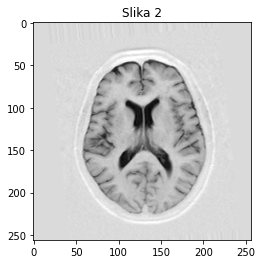

In [19]:
plt.figure()
plt.imshow(im1, cmap='gray', vmin=im2.min(), vmax=im2.max()) # pun opseg: vmin=0, vmax=65535
plt.title('Slika 2')
plt.show()

3. Slika razlika

3.1 U promenljivu im4 učitati sliku mr_glava_2.jpg u režimu za sliku u sivoj skali.

In [20]:
im4 = cv2.imread('mr_glava_2.jpg', cv2.IMREAD_GRAYSCALE)

3.2 Napraviti sliku razlika im_r1 oduzimanjem im1 i im4. Analizirati vrednosti piksela te slike. Da li su dobijene vrednosti tačne?

In [21]:
im_r1 = im1-im4

3.3 Promeniti tip slika im1 i im4 u int16 (ili neki drugi kojim mogu da se zapišu negativne vrednosti i odgovarajući opseg) i napraviti sliku razlika im_r2. Koje su sada vrednosti piksela?

In [22]:
im_r2 = im1.astype(np.int16)-im4.astype(np.int16)

3.4 Prikazati sliku im_r2. Definisati granice dinamičkog opsega za prikaz.

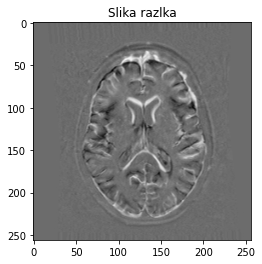

In [23]:
plt.figure()
plt.imshow(im_r2, cmap='gray', vmin=im_r2.min(), vmax=im_r2.max())
plt.title('Slika razlka')
plt.show()

3.5 Napraviti sliku apsolutnih razlika im_r3 i prikazati je. Kako se razlikuju slike im_r2 i im_r3?

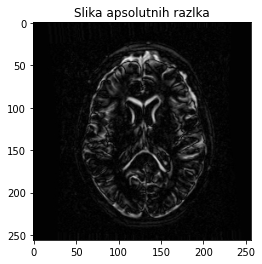

In [24]:
im_r3 = abs(im1.astype(np.int16)-im4.astype(np.int16))
plt.figure()
plt.imshow(im_r3, cmap='gray', vmin=im_r3.min(), vmax=im_r3.max())
plt.title('Slika apsolutnih razlka')
plt.show()


3.6 Napraviti sliku im_n normalizaijom vrednosti im_r3 na opseg [0, 1]. Kog tipa je ova slika? Prikazati sliku.

float64


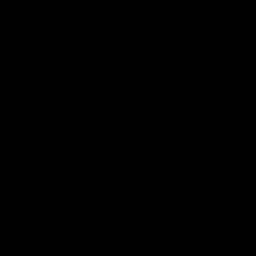

In [25]:
im_n = (im_r3-im_r3.min())/(im_r3.max()-im_r3.min())
print(im_n.dtype)
cv2_imshow(im_n) # 'Normalizovana slika apsolutnih razlika', 
cv2.waitKey(0)
cv2.destroyAllWindows()

4. Matematičke operacije

4.1 Napraviti sliku im1_2 dodavanjem vrednosti 200 na svaki piksel im1. Voditi računa o
opsegu vrednosti nove slike pa u skladu sa tim izabrati odgovarajući tip.


In [26]:
im1_2 = im1.astype(np.int16)+200

4.2 Napraviti sliku im1_3 oduzimanjem vrednosti 200 od svakog piksela slike im1. Voditi računa o opsegu vrednosti nove slike pa u skladu sa tim izabrati odgovarajući tip.

In [27]:
im1_3 = im1.astype(np.int16)-200

4.3 U jednom prozoru prikazati sliku im1, im2 i im3. Izabrati granice dinamičkog opsega za prikaz tako da je moguće uporediti ove slike. Kakav je efekat povećanja, a kakav smanjenja vrednosti piksela?

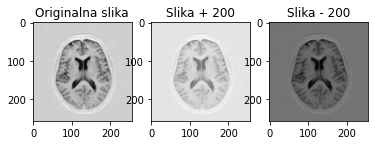

In [28]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(im1, cmap='gray')
axs[0].set_title('Originalna slika')
axs[1].imshow(im1_2, cmap='gray', vmin=0, vmax=im1_2.max())
axs[1].set_title('Slika + 200')
axs[2].imshow(im1_3, cmap='gray', vmin=im1_3.min(), vmax=255)
axs[2].set_title('Slika - 200')
plt.show()

4.4 Sliku im1 skalirati množenjem sa 3.5 i deljenjem sa 1.5. Koji su efekti?

In [29]:
im1_4 = im1*3.5
im1_5 = im1/1.5

5. Osnovne statistike slike
5.1 Odrediti minimum i maksimum slike im1. Koji je opseg slike?
5.2 Odrediti srednju vrednost slike im1. Šta možemo zaključiti na osnovu ove vrednosti?
5.3 Odrediti varijansu i standardnu devijaciju slike im1. U kojoj su vezi varijansa i
standardna devijacija?

In [30]:
# 5.1
im1_min = im1.min()
im1_max = im1.max()
print('Dinamicki opseg slike je', im1_max-im1_min, ', od', im1.min(), ' do', im1.max())

im1.min(0) # minimum po kolonama
im1.min(1) # minimum po vrstama

# 5.2
im1_srvr = im1.mean()
print('Srednja vrednost slike je', im1_srvr)

# 5.3
im1_var = im1.var()
im1_std = im1.std()
print('Varijansa slike je ', im1_var)
print('Standardna devijacija slike je', im1_std)


Dinamicki opseg slike je 254 , od 0  do 254
Srednja vrednost slike je 188.45872497558594
Varijansa slike je  1338.6241508645471
Standardna devijacija slike je 36.58721294201769


6. Histogram
6.1 Napraviti histogram slike im1 u opsegu od 0 do 255 sa korakom 1. Koliko odbiraka ima
u ovom vektoru? Prikazati histogram.
6.2 Napravit normalizovani histogram? Šta je normalizovani histogram? Prikazati ga.
6.3 Koliki udeo (%) slike im1 ima vrednost 206?
6.4 Koliki udeo (%) slike im1 ima vrednost ispod 200?

Broj odmeraka u histogramu je 256


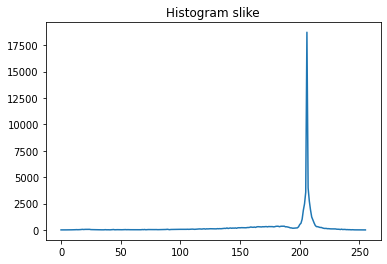

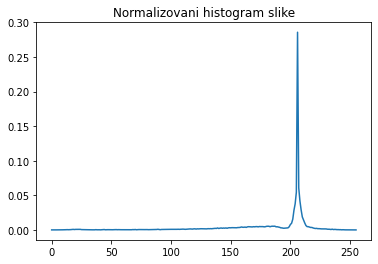

28.58 % slike ima vrednost 206
32.77 % slike ima vrednost ispod 200


In [31]:
# 6.1
h = cv2.calcHist([im1], [0], None, [256], [0, 256])
print('Broj odmeraka u histogramu je', h.size)
plt.figure()
plt.plot(h)
plt.title('Histogram slike')
plt.show()

# 6.2
h_n = h/im1.size
plt.figure()
plt.plot(h_n)
plt.title('Normalizovani histogram slike')
plt.show()

# 6.3
udeo206 = h_n[206]
print(round(udeo206[0]*100, 2), '% slike ima vrednost 206')

# 6.4
udeo_do_200 = sum(h_n[:200])
print(round(udeo_do_200[0]*100, 2), '% slike ima vrednost ispod 200')


6.2 Napravit normalizovani histogram? Šta je normalizovani histogram? Prikazati ga.
6.3 Koliki udeo (%) slike im1 ima vrednost 206?
6.4 Koliki udeo (%) slike im1 ima vrednost ispod 200?
7. Osnovne manipulacije nad DICOM fajlovima
7.1 Učitati fajl 00044.dcm u promenljivu dc i ispisati je na ekranu. Analizirati kako su
predstavljeni podaci.
7.2 Izbrisati atribut PatientID iz promenljive dc.
7.3 Anonimizovati DICOM fajl tako što ćete zameniti PatientName praznim stringom i
dodati proizvoljni PatientID. Sačuvati ove izmene u 00044_1.dcm
7.4 Pristupiti atributu PatientID pomoću njegovor taga [0x0010, 0x0020].
7.5 Iz DICOM fajla izvući sliku u promenljivu im. Prikazati sliku vodeći računa o granicama
dinamičkog opsega. Koji modalitet snimanja je u pitanju? Proveriti pretpostavku
analizom atributa Modality u promenljivoj dc (tag [0x0008, 0x0060]).

In [32]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.1 MB/s 


/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '1.2.826.0.1.3680043.8.1055.1.20111102150801856.09856324.62601018'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '1.2.826.0.1.3680043.8.1055.1.20111102150758591.96842950.07877442'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 230
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.1055.1.20111102150801856.09856324.62601018
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.1055.1
(0002, 0013) Implementation Version Name         SH: 'dicomlibrary-100'
(0002, 0016) Source Application Entity Title     AE: 'DICOMLIBRARY'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0012) Instance Creation Date              DA: '20061012'
(0008, 0013) Instance Creation Time              TM: '091616.0

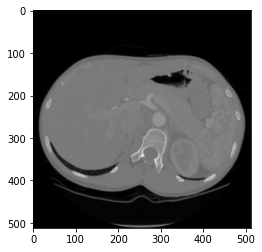


(0008, 0060) Modality                            CS: 'CT'


In [33]:
import pydicom as dicom
import matplotlib.pyplot as plt

# 7.1
dc = dicom.dcmread('00044.dcm') # ukoliko se fajl nalazi u drugom folderu ovde staviti putanju do njega
print(dc)
print()

# 7.2
del dc.PatientID

# 7.3
dc.PatientName = ''
dc.PatientID = '000123_123'
dc.save_as('00044_1.dcm')

# 7.4
print(dc[0x0010, 0x0020])

# 7.5
im = dc.pixel_array
plt.figure(1)
plt.imshow(im, cmap='gray', vmin=im.min(), vmax=im.max())
plt.show()
print()
print(dc[0x0008, 0x0060])